In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Simple start to Support Vector Machines (SVM) is linear support vector binary classifiers.
Imagine you've got some data from a course about test scores, project scores, and whether the student passed or failed the course

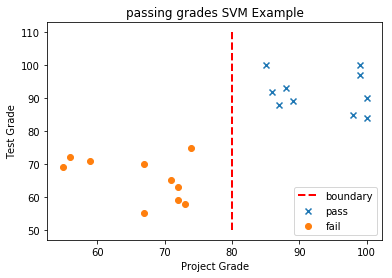

In [0]:
# Example data.
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

# Reusable function to plot our data.
def setup_plot():
  plt.scatter(test_data.project[0:10], test_data.test[0:10], marker = 'x')
  plt.scatter(test_data.project[10:20], test_data.test[10:20], marker = 'o')
  
  #pass/fail line
  plt.plot([80,80], [50,110], 'r--', lw = 2)
  plt.xlabel('Project Grade')
  plt.ylabel('Test Grade')
  
setup_plot()
plt.legend(['boundary', 'pass', 'fail'], loc=4)
plt.title('passing grades SVM Example')
plt.show()

The dotted line is an eye ball decision boundary between test and fail, but there are other options apart from this.

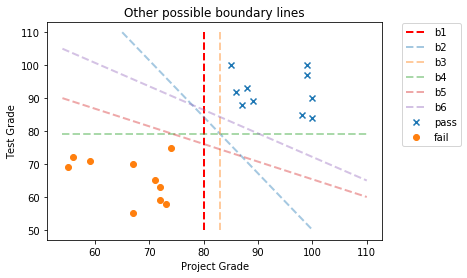

In [0]:
# Throw some other possible boundary lines into the mix.

# Rebuild the previous plot.
setup_plot()

# Add some new boundary lines.
plt.plot([65, 100], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([83, 83], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [79, 79], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [90, 60], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [105, 65], '--', lw=2, alpha=0.4)

plt.legend(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'pass', 'fail'],
            bbox_to_anchor=(0.25, 0.02, 1, 1))
plt.title('Other possible boundary lines')
plt.show()

##Margin and Support Vectors
The boundary in SVM is formalized by defining the *margin* as the distance between the neaest point fo each class and the boundary. The nearest point for each class is at (85,100) and (74,75). These nearest points are the support vectors that our model is named after. The distance from our support vectors to the red boundary line is just the horizontal distance (because our boundary happens to be vertical). The margin is 5 from the pass support vector and 6 from the fail support vector.

Several of the other boundary lines are worse, like the orange boundary line b3, but looking at the light blue boundary line b2 above you can probably see without having to do the math that the margin is larger so it's a better boundary than our initial red boundary. The goal of SVM is find the best boundary, or the boundary that optimizes the margin

##Finding the best boundary

use sklearn
We're doing a linear SVM example, so we'll force the boundary to be linear. To do this we'll use SVC with a linear kernel. We'll get into what that is and other options later. The "C" in SVC here stands for "classifier


In [0]:
from sklearn.svm import SVC
#instantiate model and fit the data

X = test_data[['test', 'project']]
Y = test_data['pass']
svm = SVC(kernel = 'linear')
svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

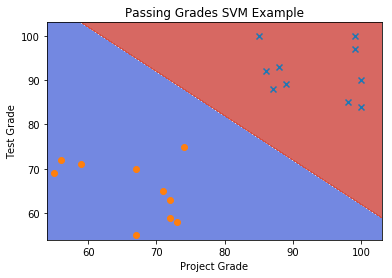

In [0]:
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()]) =='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()


Since the data is in two dimensions, this is a pretty cut and dry example. The boundary may not always be a straight line.
The boundary can be called a "hyperplane" because it is n minus one dimensional space.

For example, in a 16-dimensional plane, the hyperlane would have a 15 dimensional space, which is hard to visualize.

Also of note is that this dataset has a boundary that groups each observation exclusively on one side of the line. This is called a hard margin. It won't always be possible to make a boundary with a hard margin, however. When it's not, the problem is called soft margin (these two terms apply to all classifiers, by the way).

To deal with this kind of problem, SVM imposes a cost function. The cost function gives SVM two things to balance: the size of the margin (which it wants to maximize) and the cumulative distance of points on the wrong side of the margin from the boundary (which it wants to minimize).

How SVM balances these factors is complex and understanding the vector math behind it is not essential. What is important to know is that you can control the priorities of this tradeoff by controlling that weight. How you'd want to tune it depends on your tolerance for inaccurate results as compared to large margins.